In [1]:
!uv pip install -q \
    numpy==2.3.2 \
    matplotlib==3.10.6 \
    scikit-learn==1.7.1


In [ ]:
from typing import Dict, Optional

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [ ]:
# Generate 100 samples of 2 featured data
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=2)

print(f"shape of X: {X.shape}")
print(f"shape of y: {y.shape}")

label_to_class = {0: "cat", 1: "dog"}

shape of X: (100, 2)
shape of y: (100,)


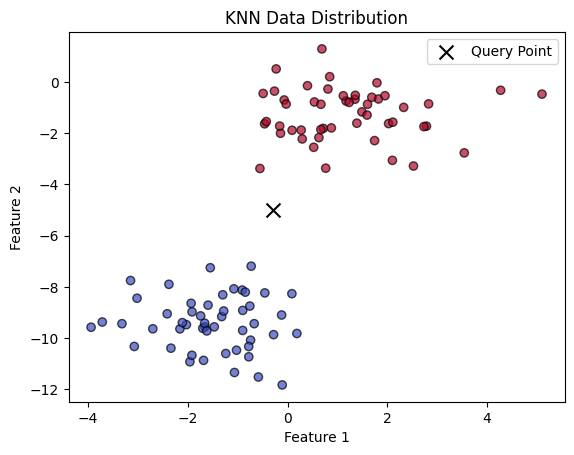

In [ ]:
x_axis = X[:, 0]  # Feature 1
y_axis = X[:, 1]  # Feature 2

# Scatter plot with class coloring
plt.scatter(x_axis, y_axis, c=y, cmap="coolwarm", alpha=0.7, edgecolor="k")

# Plot the query point
plt.scatter(x=-0.3, y=-5, c="black", marker="x", s=100, label="Query Point")

# Add labels and legend
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Data Distribution")
plt.legend()
plt.show()

In [ ]:
def euclidean_distance(point_a: np.ndarray, point_b: np.ndarray):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((point_a - point_b) ** 2))


def k_nearest_neighbors(
    train_features: np.ndarray,
    train_labels: np.ndarray,
    query_point: np.ndarray,
    label_to_class: Optional[Dict[int, str]] = None,
    k: int = 5,
) -> str | int:
    """
    train_features -> (n_samples, n_features)
    train_labels   -> (n_samples,)
    query_point    -> shape (n_features,)
    k              -> number of neighbors
    """

    num_samples = train_features.shape[0]
    distances = []

    # Compute distance from query point to each training sample
    for i in range(num_samples):
        dist = euclidean_distance(query_point, train_features[i])
        distances.append((dist, train_labels[i]))

    # Sort by distance and take top-k
    distances = sorted(distances, key=lambda x: x[0])[:k]

    # Extract labels of the k nearest neighbors
    neighbor_labels = np.array([label for _, label in distances])

    # Count majority vote
    unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
    predicted_label = unique_labels[counts.argmax()]

    if label_to_class:
        return label_to_class[int(predicted_label)]

    return int(predicted_label)

In [6]:
query_point = np.array([-0.3, -5])
prediction = k_nearest_neighbors(
    X, y, query_point, label_to_class=label_to_class
)
print("Predicted class:", prediction)

Predicted class: dog
